In [2]:
import numpy as np
import matplotlib.pyplot as plt

<img src="Figs/fga.png" alt="isolated"/>


<h1 style="text-align: center;">Fundamentos de Transmissão</h1>

<h3 style="text-align: center;">Disciplina: Princípios de Comunicação</h3>


<p style="text-align: center;">Prof. Daniel C. Araújo</p>

## Conteúdo

1. Introdução 
2. Distorções em Transmissão
3. Tipos de distorção
4. Energia e Potência

<h1 style="text-align: center;">Introdução</h1>


## Sistemas Linear e Invariantes no Tempo

 - Sistemas LTI podem ser bem caracterizados no tempo

> Caracterização no tempo :         $$y(t) = \int _{-\infty}^{\infty} h (t - \tau) x(\tau)d\tau$$

em que, $h(t)$ é considerado o sistema, $x(t)$ é a entrada no mesmo e a saída do sistema é dado por $y(t)$ 

 - Sistemas LTI podem ser bem caracterizados no tempo

> Caracterização na frequência :   $$ Y(f) = H(f)X(f) $$

em que, 
$$
\begin{align*}
   Y(f) = \mathcal{F}[y(t)] \\
   X(f) = \mathcal{F}[x(t)] \\
   H(f) = \mathcal{F}[h(t)] \\
\end{align*}
$$

## Transmissão

 - Considerando o canal de transmissão como um sistema LIT é possível expressar o sinal recebido como:

$$ \begin{align*} 
Y(f)   &= H(f)X(f) \\
|Y(f)|e^{\jmath \theta _y(f)} &= |H(f)|e^{\jmath \theta _h(f)} |X(f)|e^{\jmath \theta _x(f)}
\end{align*}
$$
Portanto,
$$ \begin{align*} 
|Y(f)| &= |H(f)| |X(f)| \\
\theta _y(f) &= \theta _h(f) + \theta _x(f)
\end{align*}
$$

> O sinal recebido é uma versão de $x(t) com  a amplitude e fase do sinal alteradas.

<h1 style="text-align: center;">Distorções em Transmissão</h1>

## Transmissão sem distorção 

 - Quais as condições para que não haja distorção em uma transmissão?
 
 > O sinal recebido deve ser uma réplica do sinal transmitido. Ou seja, a forma de onda do sinal deve ser igual.


 - A condição de não-distorção é:

 $$
   y(t) = k x(t - t_d)
 $$

  - Representação na frequência: 

  $$
   Y(f) = k X(f)e^{-\jmath 2\pi f t_d}.
  $$

 Portanto,  

 $$
 H(f) = k e^{-\jmath 2\pi f t_d}
 $$
 
 > * Frequência angular : $\omega = 2\pi f$
 > * Atraso de grupo : $t_d = - \frac{1}{2\pi}\frac{d \theta(f)}{df}$ 
 > * Atraso de portadora : $t_p = -\frac{\theta(f_0)}{2\pi f_o}$ 


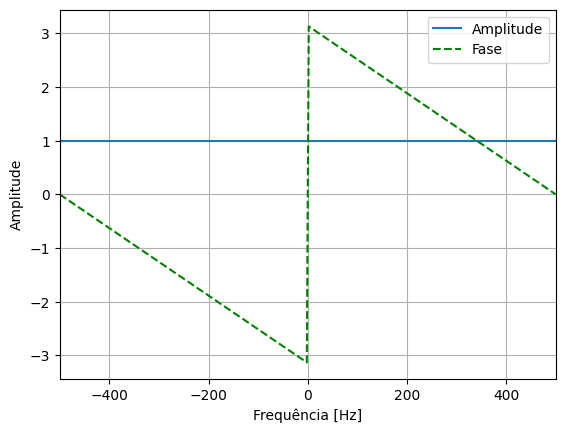

In [18]:
fs = 1e3
nSamples = 2**8
td = 1*(1/fs)    

f = np.linspace(-fs/2,fs/2,nSamples)

Hf = np.ones(nSamples)
theta = -2*np.pi*f*td

plt.plot(f,Hf,label='Amplitude')
plt.plot(f,theta % (2*np.pi) -np.pi,'g--',label='Fase')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.xlim([-fs/2,fs/2])
plt.legend()
plt.grid()
plt.show()

<h1 style="text-align: center;">Tipos de distorção</h1>

## Distorção linear